# 🐾 Dog Breed Identification 🦴

### Determine the breed of a dog in an image

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data is from Kaggle's dog breed identification competition. <br>

From: https://www.kaggle.com/c/dog-breed-identification/overview

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog bread of each test image. <br>

From:  https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* Input: Unstructured Data: images <br>
Deep Learning / Transfer Learning
* Output: 120 breeds of dogs <br>
120 different classes <br>

Train Dataset: 10200 images with labels <br>
Test Dataset: 10400 images

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import os
import sys
import datetime
from IPython.display import Image

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [91]:
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

TF version: 2.10.0
TF Hub version: 0.13.0


In [2]:
print(tf.config.list_physical_devices())

TF version: 2.10.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# Check for GPU availability

print("GPU", "available" if tf.config.list_physical_devices('GPU') else "not available")

GPU available


In [8]:
labels_csv = pd.read_csv("labels.csv")

In [9]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [10]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

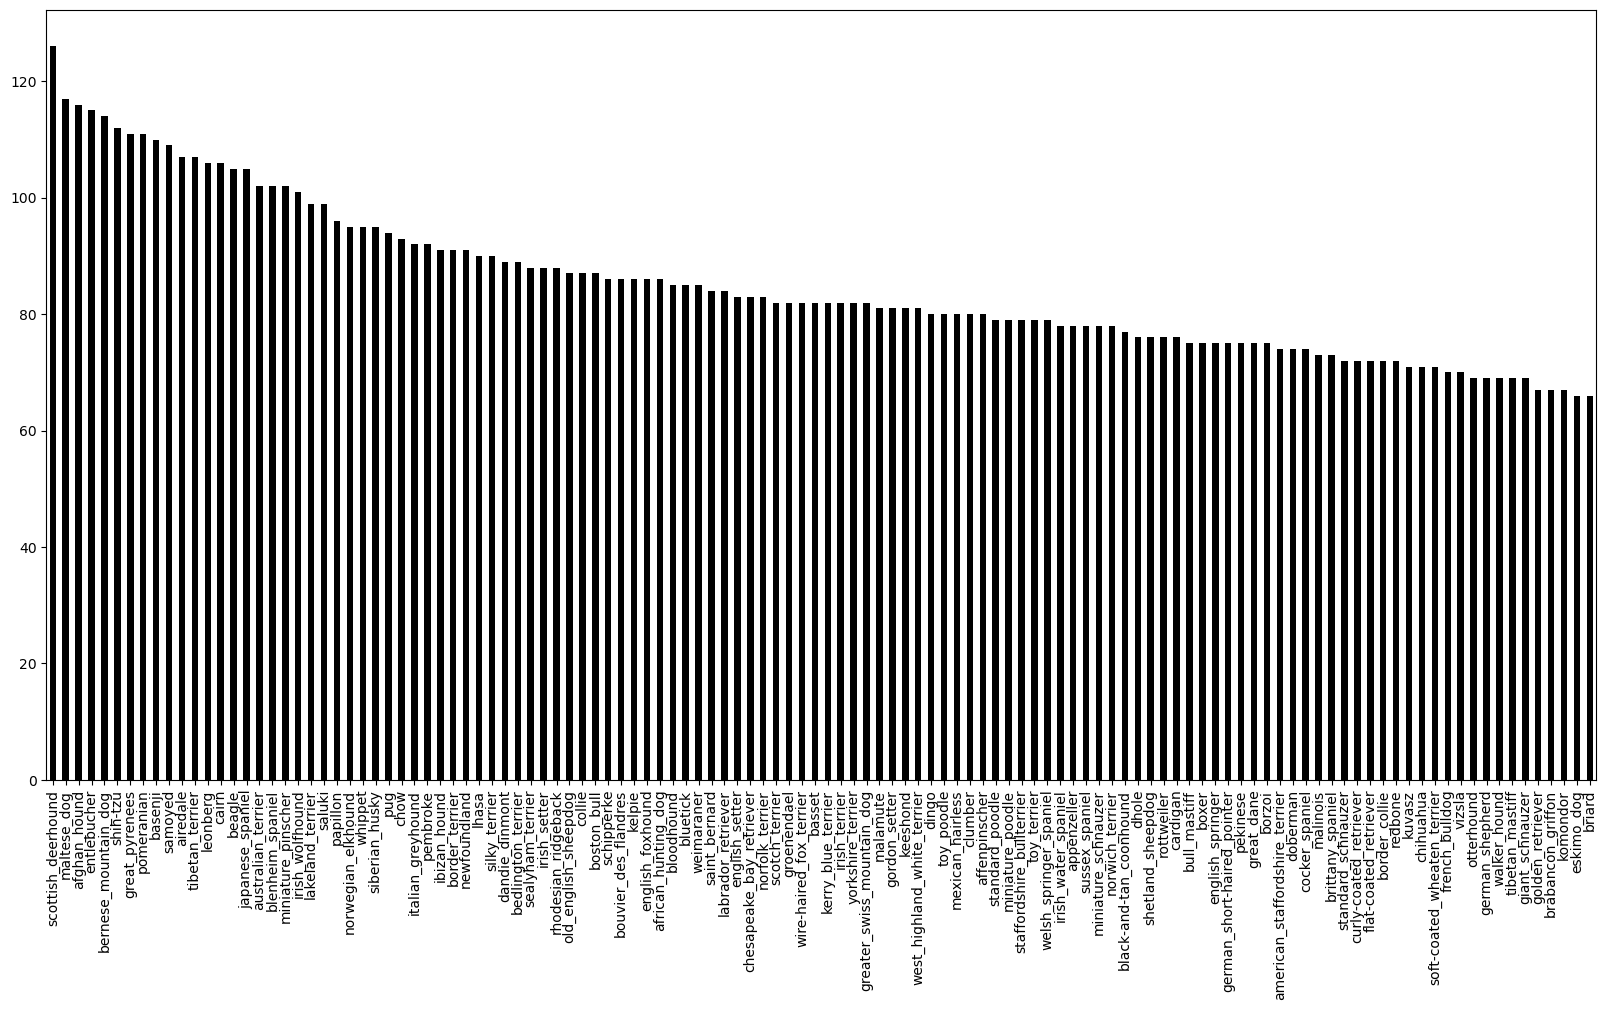

In [11]:
labels_csv.breed.value_counts().plot.bar(figsize=(20, 10), color="k");

In [12]:
# The median value for the number of images per breed

labels_csv.breed.value_counts().median()

82.0

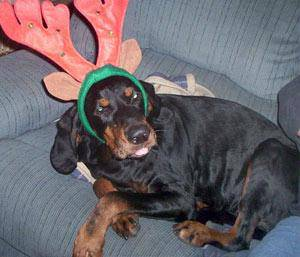

In [13]:
# See one of the images as an example

Image("train/00ba244566e36e0af3d979320fd3017f.jpg")

# Step 1: Get data ready

### Getting images and their labels
Let's get a list of all of our image file pathnames

In [14]:
# Create path-names from image ID's

filenames = ["train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:5]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [15]:
if len(os.listdir("train/")) == len(filenames):
  print("Filenames match actual amount of files: Proceed.")
else:
  print("Filenames do not match actual amount of files: Check the target directory.")

Filenames match actual amount of files: Proceed.


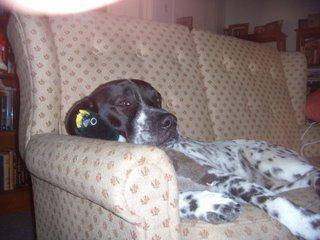

In [16]:
Image(filenames[754])

In [17]:
labels_csv["breed"][754]

'german_short-haired_pointer'

In [18]:
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
if len(labels) == len(filenames):
  print("Number of labels match actual amount of files: Proceed.")
else:
  print("Number of labels do not match actual amount of files: Check the target directory.")

Number of labels match actual amount of files: Proceed.


In [20]:
# Find the unique label values

unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [22]:
# There are 120 unique breeds

unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [23]:
# Turn every label into a boolean array

boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
len(boolean_labels), len(filenames)

(10222, 10222)

### Creating a Validation set

In [25]:
# Setup X and y

X = filenames
y = boolean_labels

### Modelling with ~3000 images

In [26]:
NUM_IMAGES = 3000

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [28]:
len(X_train), len(X_val), len(y_train), len(y_val)

(2400, 600, 2400, 600)

# Turn images into Tensors
## Preprocessing Images

To preprocess images into Tensors. <br>
Define a function:

1. Take an image file as an input
2. Use TF to read the file and save it into a variable, `image`
3. Turn the `image` (jpg) into Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

In [29]:
image = plt.imread(filenames[42])
image.shape

(257, 350, 3)

In [30]:
image.max(), image.min()

(255, 0)

RGB image turned into an array is now Red, Green and Blue (3), <br>
with values for each color from 0 to 255

In [31]:
# Define image size

IMG_SIZE = 224

In [32]:
# Create a function for preprocessing images:

# Image as the input
# Read an image file
# Turn jpeg into numerical tensor with 3 colour channels
# Convert the colour values from 0-255 to 0-1
# Resize the image to (224, 224)
# Return the modified image

def image_to_tensor(image_path, img_size=IMG_SIZE):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

## Turn data into batches (size 32)

Define 32 for the batch size (proposed by Yann LeCun) will facilitate the task for the memory. <br>
Data must be in form of tuples `(image, label)` to use TF effectively

In [33]:
# Create a function to return a tuple

def get_image_label(image_path, label):
    image = image_to_tensor(image_path)
    return image, label

In [34]:
# Example of tensor tuple

(image_to_tensor(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [35]:
# Define the batch size

BATCH_SIZE = 32

In [36]:
# Create a function to turn data into batches:

# Create batches of data out of image (X) and label (y) pairs
# Shuffles the training data
# Do not shuffle validation data
# Accepts test data as input (without labels)

def data_to_batch(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data_batch = data.map(image_to_tensor).batch(BATCH_SIZE)
        return data_batch
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
        data = data.shuffle(buffer_size=len(x))
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
        return data_batch

In [37]:
# Create training and validation data batches

train_data = data_to_batch(X_train, y_train)
val_data = data_to_batch(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [38]:
# Attributes of the data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

(None is for the batch size, that is 32 in reality, <br>
but it shows None because it is flexible)

## Visualizing data batches

The data is now in batches: visualization will be produced to facilitate the understanding

In [39]:
# Create a funcion for viewing images in a data batch

def show_25_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")

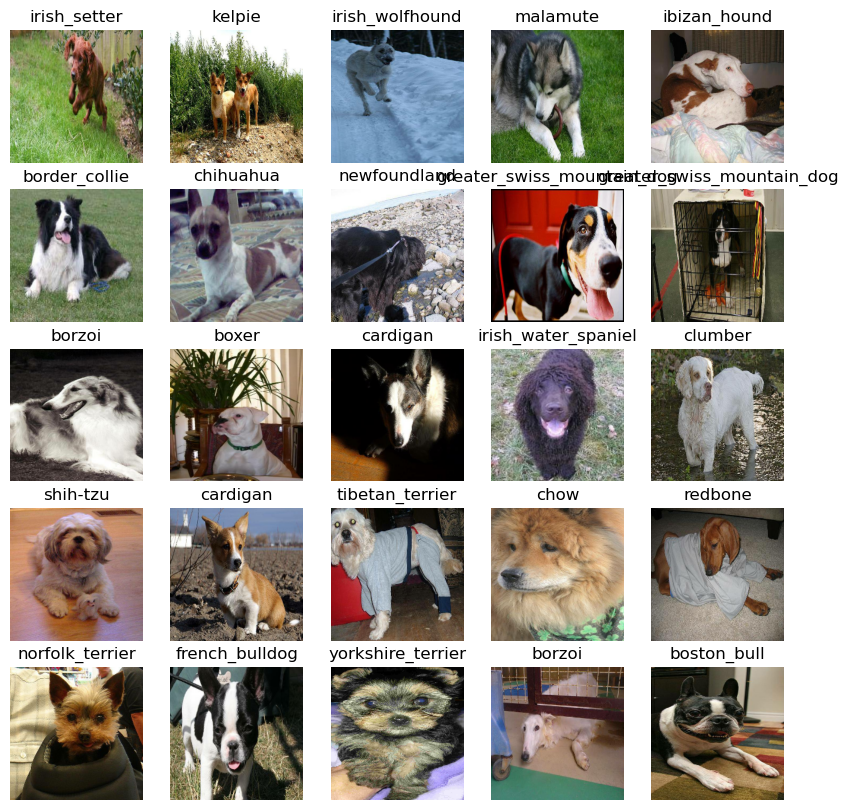

In [40]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

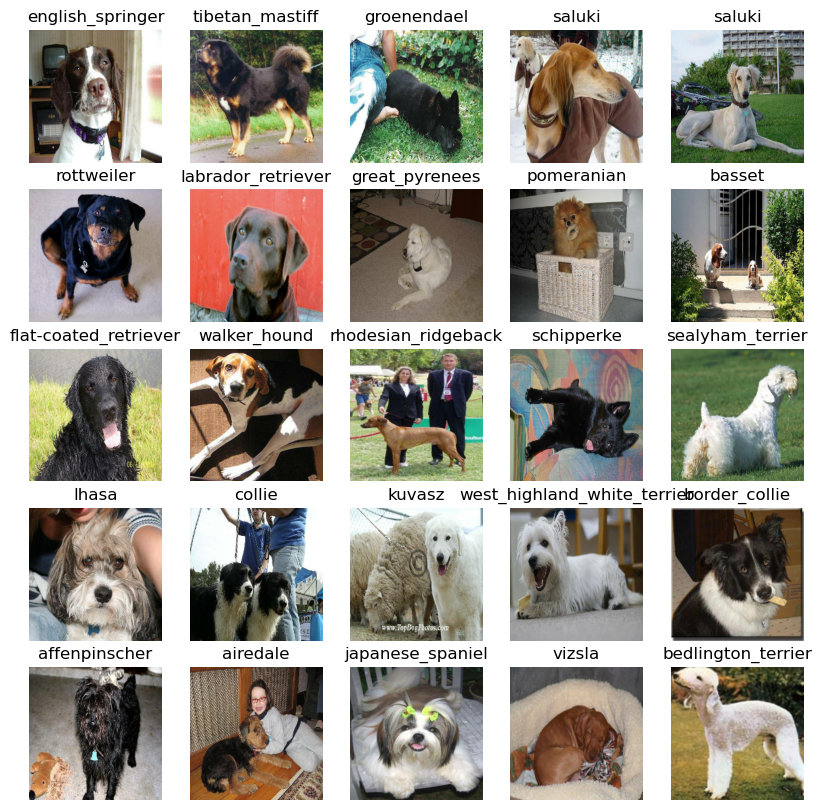

In [41]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Step 2: Building a model

In [80]:
# Input and Output Shapes

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)

In [133]:
# Setup model URL from TensorFlow Hub

MODEL_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

Create a function which:

* Takes the input shape, output shape and the model's URL as parameters.
* Defines the layers in a Keras model sequentially (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

In [134]:
# Create a function which builds a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", MODEL_URL)
    # modelo = hub.load(MODEL_URL)
    model = keras.Sequential([
        hub.KerasLayer(MODEL_URL, trainable=True),
        keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")])
    model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
                  optimizer=keras.optimizers.Adam(0.0001), 
                  metrics=["accuracy"])
    model.build(INPUT_SHAPE) 
    return model

In [135]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_8 (Dense)             (None, 120)               120240    
                                                                 
Total params: 3,660,505
Trainable params: 3,626,393
Non-trainable params: 34,112
_________________________________________________________________


## Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

Two callbacks:
* One for TensorBoard, to track model progress
    * Load the TensorBoard notebook extension
    * Create a TensorBoard callback which is able to save logs to a directory and pass it the model's `fit()` function.
    * Visualize the model training logs with the `%tensorboard`magic function
* Another for early stopping, to prevent the model from training too long

In [136]:
# Load TensorBoard notebook extension

%load_ext tensorboard

In [137]:
# Create a function to build a TensorBoard callback

def create_tensorboard_callback():
    logdir = os.path.join(".\logs",
                          datetime.datetime.now().strftime("%Y%m%d_%H%M"))
    return keras.callbacks.TensorBoard(logdir)

In [138]:
# Create the early stopping callback to prevent overfitting

early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Train the model (on a subset of data)

In [139]:
# Define number of epochs (100 here),
# which is the number of times that the model will go to the layers (2 here)

NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Create a function which trains a model

* `create_model()`
* `create_tensorboard_callback()`
* `fit()` the model with the training dataset, the validation dataset and the `NUM_EPOCHS`
* Return the trained model

In [141]:
def train_model():
    model = create_model()
    tensorboard = create_tensorboard_callback()
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])
    return model

In [142]:
model = train_model()

Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
Epoch 1/100


C:\Users\nexina\anaconda3\envs\project_dog_vision\env\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 [==============================] - 19s 139ms/step - loss: 4.2799 - accuracy: 0.1533 - val_loss: 2.5390 - val_accuracy: 0.3967
Epoch 2/100
75/75 [==============================] - 10s 134ms/step - loss: 1.4981 - accuracy: 0.6554 - val_loss: 1.6260 - val_accuracy: 0.5983
Epoch 3/100
75/75 [==============================] - 10s 133ms/step - loss: 0.6399 - accuracy: 0.8858 - val_loss: 1.5183 - val_accuracy: 0.6150
Epoch 4/100
75/75 [==============================] - 10s 133ms/step - loss: 0.3678 - accuracy: 0.9575 - val_loss: 1.4564 - val_accuracy: 0.6433
Epoch 5/100
75/75 [==============================] - 10s 136ms/step - loss: 0.2646 - accuracy: 0.9792 - val_loss: 1.4078 - val_accuracy: 0.6333
Epoch 6/100
75/75 [==============================] - 10s 135ms/step - loss: 0.2114 - accuracy: 0.9917 - val_loss: 1.3984 - val_accuracy: 0.6400
Epoch 7/100
75/75 [==============================] - 10s 134ms/step - loss: 0.1826 - accuracy: 0.9967 - val_loss: 1.4089 - val_accuracy: 0.6450
Epoc

The `accuracy` of the training (0.9983) is much better than the accuracy of the validation dataset `val_accuracy`(0.6583), this suggest that the model is **overfitting**.

In [143]:
# Checking the TensorBoard logs

%tensorboard --logdir=./logs/

### Make Predictions and Evaluations using the trained model

In [144]:
predictions = model.predict(val_data, verbose=1)
predictions

19/19 [==============================] - 1s 37ms/step


array([[6.54154110e-06, 1.36063227e-05, 8.00236103e-06, ...,
        1.72317068e-05, 2.60824140e-06, 2.34236245e-06],
       [5.32486010e-04, 5.36913649e-05, 7.96011591e-06, ...,
        2.03522958e-07, 4.66888787e-06, 1.16632626e-04],
       [2.59279896e-05, 1.08589535e-04, 6.51282753e-05, ...,
        2.21862465e-05, 1.65958511e-06, 1.09547127e-05],
       ...,
       [6.54493831e-03, 3.42139369e-03, 9.53193940e-03, ...,
        7.76700035e-04, 2.06055194e-02, 8.42698850e-04],
       [3.62126218e-09, 1.64684077e-09, 2.30402932e-08, ...,
        7.49224256e-08, 5.51478024e-06, 5.69452530e-09],
       [4.09633503e-06, 2.68968633e-05, 1.43995669e-04, ...,
        1.12395443e-04, 5.11680955e-05, 3.03835441e-06]], dtype=float32)

In [145]:
predictions.shape

(600, 120)

In [154]:
index = 66
print(f"Max Value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

Max Value (probability of prediction): 0.9938673377037048
Sum: 0.9999999403953552
Max index: 80
Predicted label: norwegian_elkhound


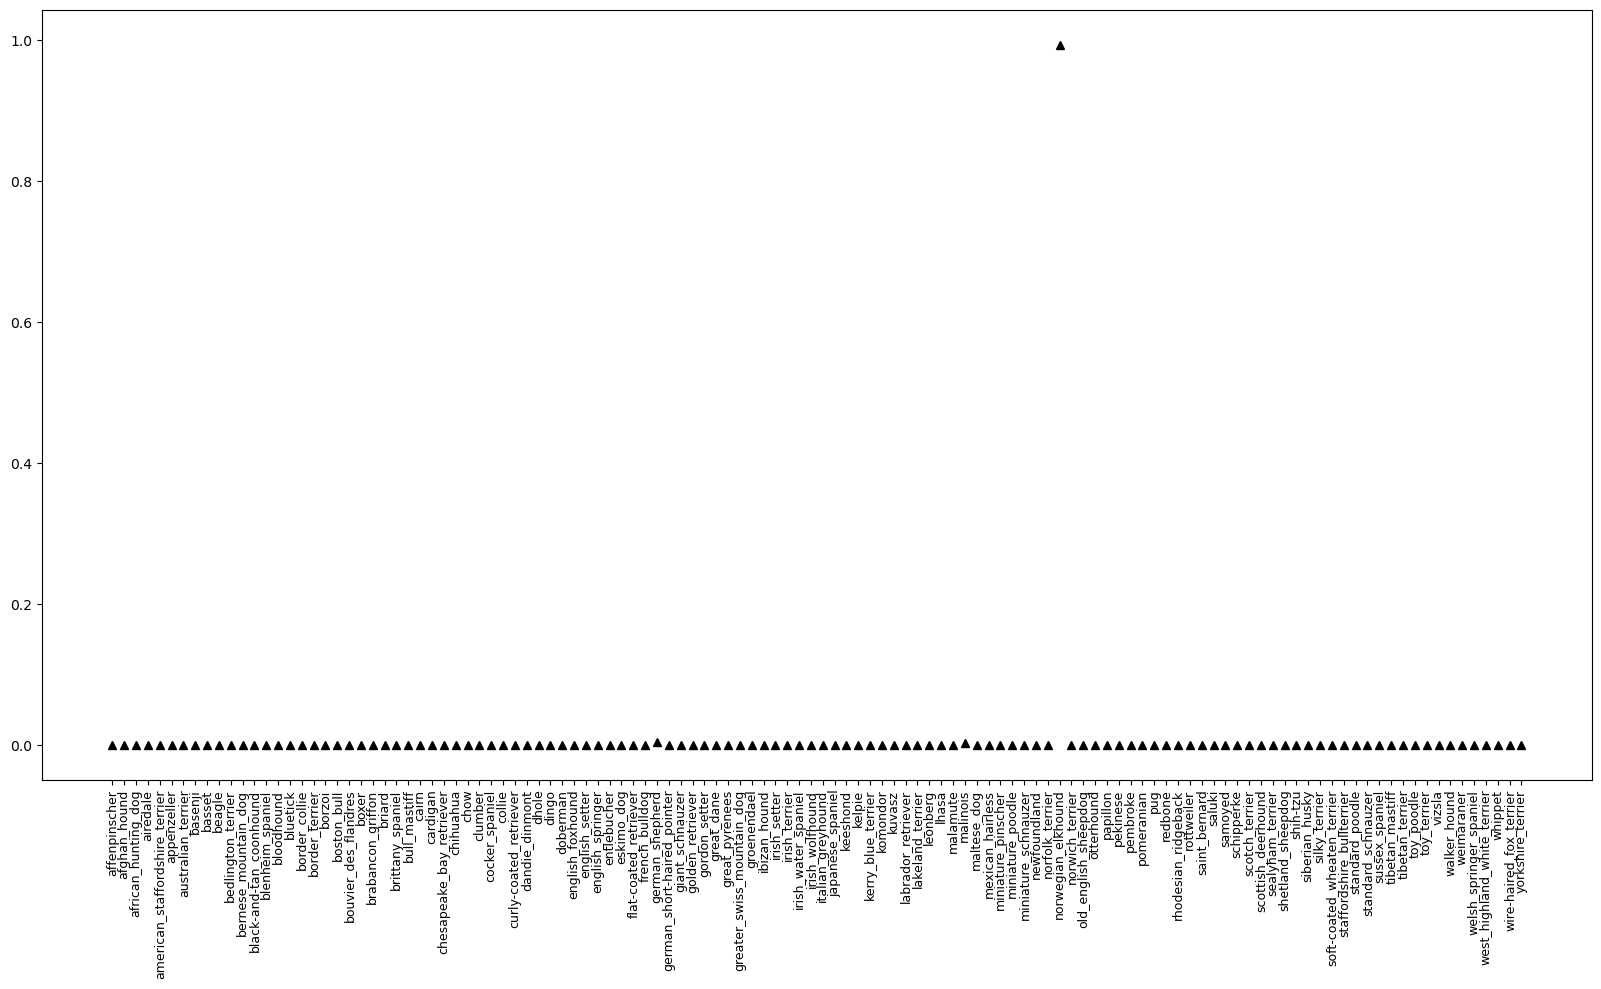

In [155]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(unique_breeds, predictions[index], "^k")
ax.xaxis.set_tick_params(rotation=90, labelsize=9)

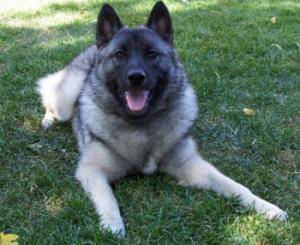

In [156]:
Image(X_val[index], width=300, height=300)

In [157]:
unique_breeds[np.argmax(y_val[index])]

'norwegian_elkhound'

In [158]:
def get_pred_label(prediction_probabilities):
    return unique_breeds[np.argmax(prediction_probabilities)]

### Create a function to UNBATCH Dataset

In [159]:
images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

In [160]:
get_pred_label(labels_[42])

'bloodhound'

In [161]:
get_pred_label(predictions[42])

'bloodhound'

In [162]:
def unbatchify(data):
    images = []
    labels = []
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

In [163]:
val_images, val_labels = unbatchify(val_data)

In [164]:
get_pred_label(val_labels[42])

'affenpinscher'

### function(x) Plot Predictions

#### Inputs: 
* array of prediction probabilities, 
* array of thruth labels, 
* array of images, and 
* an integer

#### Converts the prediction probabilities into a prediction label

#### Plot:
* the predicted label, 
* its predicted probability,
* the truth label and
* the target image

In [165]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    pred_label = get_pred_label(pred_prob)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    if pred_label == true_label:
        color = "g"
    else:
        color = "r"
    plt.title("Pred:{}, Proba{:2.0f}%, True:{}".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

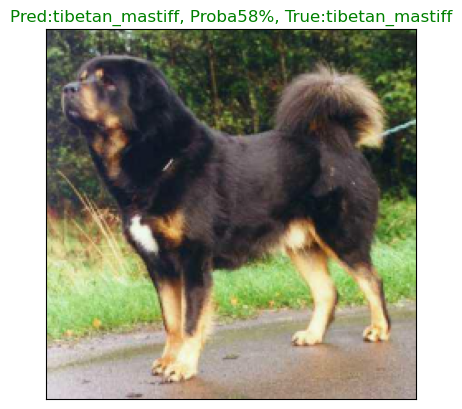

In [166]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

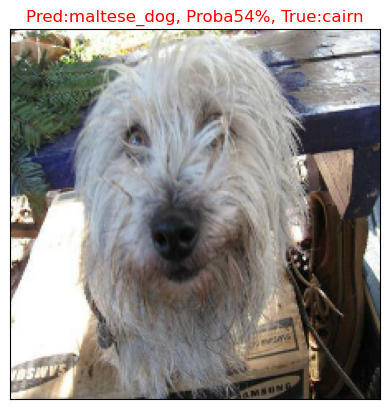

In [167]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=69)

### function(x) Visualize top predictions

#### Inputs: 
* array of prediction probabilities, 
* array of truth labels, 
* an integer

#### Find the prediction with `get_pred_label()`

#### Find the top 10:
* Prediction probabilities indexes
* Prediction probabilities values
* Prediction labels

#### Plot the top 10
* Prediction probabilities values
* Prediction labels

In [168]:
predictions[42].argsort()

array([ 20,  54,  73,   2,  64, 111,  26,  10,  41,  61,  32,  16,  82,
        59, 100,  97,  27,  78,  53,   0,  44,  95,  86, 115, 106,  43,
       116,  50,  34, 110, 119, 117,  19,  13,  48,  79, 101,  11,  60,
       118,  67,  58,  85,  81,  38,  42,  40,  96,  94,   5,  77,  74,
        99,  87,  57,  84,  92, 109,  76,  29,   4,  36,  31,  70,   7,
        66,  35,  24,  65,  62,  80,  39,  30,  98,  18, 107,  68,   1,
        28,  23,  55,  88,  63,  93,  75,   6, 104,  33,  90,  17, 108,
        47,  83,  72,   3,  69, 103,  71,  22,  51,  91,  45,  37, 113,
        46,  56,  25,  15, 114, 112,  21,  52, 102, 105,  49,   9,  12,
         8,  89,  14], dtype=int64)

In [169]:
# Returns the numbers of the order

In [170]:
predictions[0].argsort()[-10:][::-1]

array([ 41,  47,  24,  40,  97,   5,  44,  19, 114,  60], dtype=int64)

In [171]:
# Those are the top ten values

In [172]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([9.2120725e-01, 3.8645077e-02, 2.5304997e-02, 4.9441950e-03,
       2.7315873e-03, 1.1692294e-03, 6.4503768e-04, 5.7076884e-04,
       4.8489770e-04, 4.2217970e-04], dtype=float32)

In [173]:
predictions[0].max()

0.92120725

In [174]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['english_springer', 'german_short-haired_pointer',
       'brittany_spaniel', 'english_setter', 'scottish_deerhound',
       'appenzeller', 'flat-coated_retriever', 'boston_bull',
       'weimaraner', 'italian_greyhound'], dtype=object)

In [175]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    pred_label = get_pred_label(pred_prob)
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color="k")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation=90)
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("g")
    else:
        pass

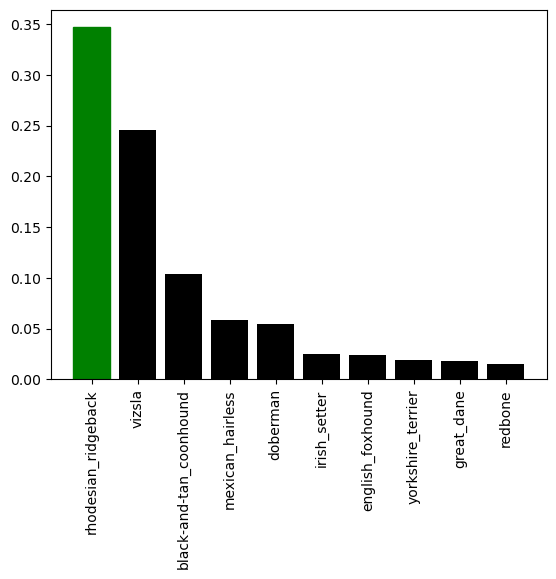

In [176]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=12)

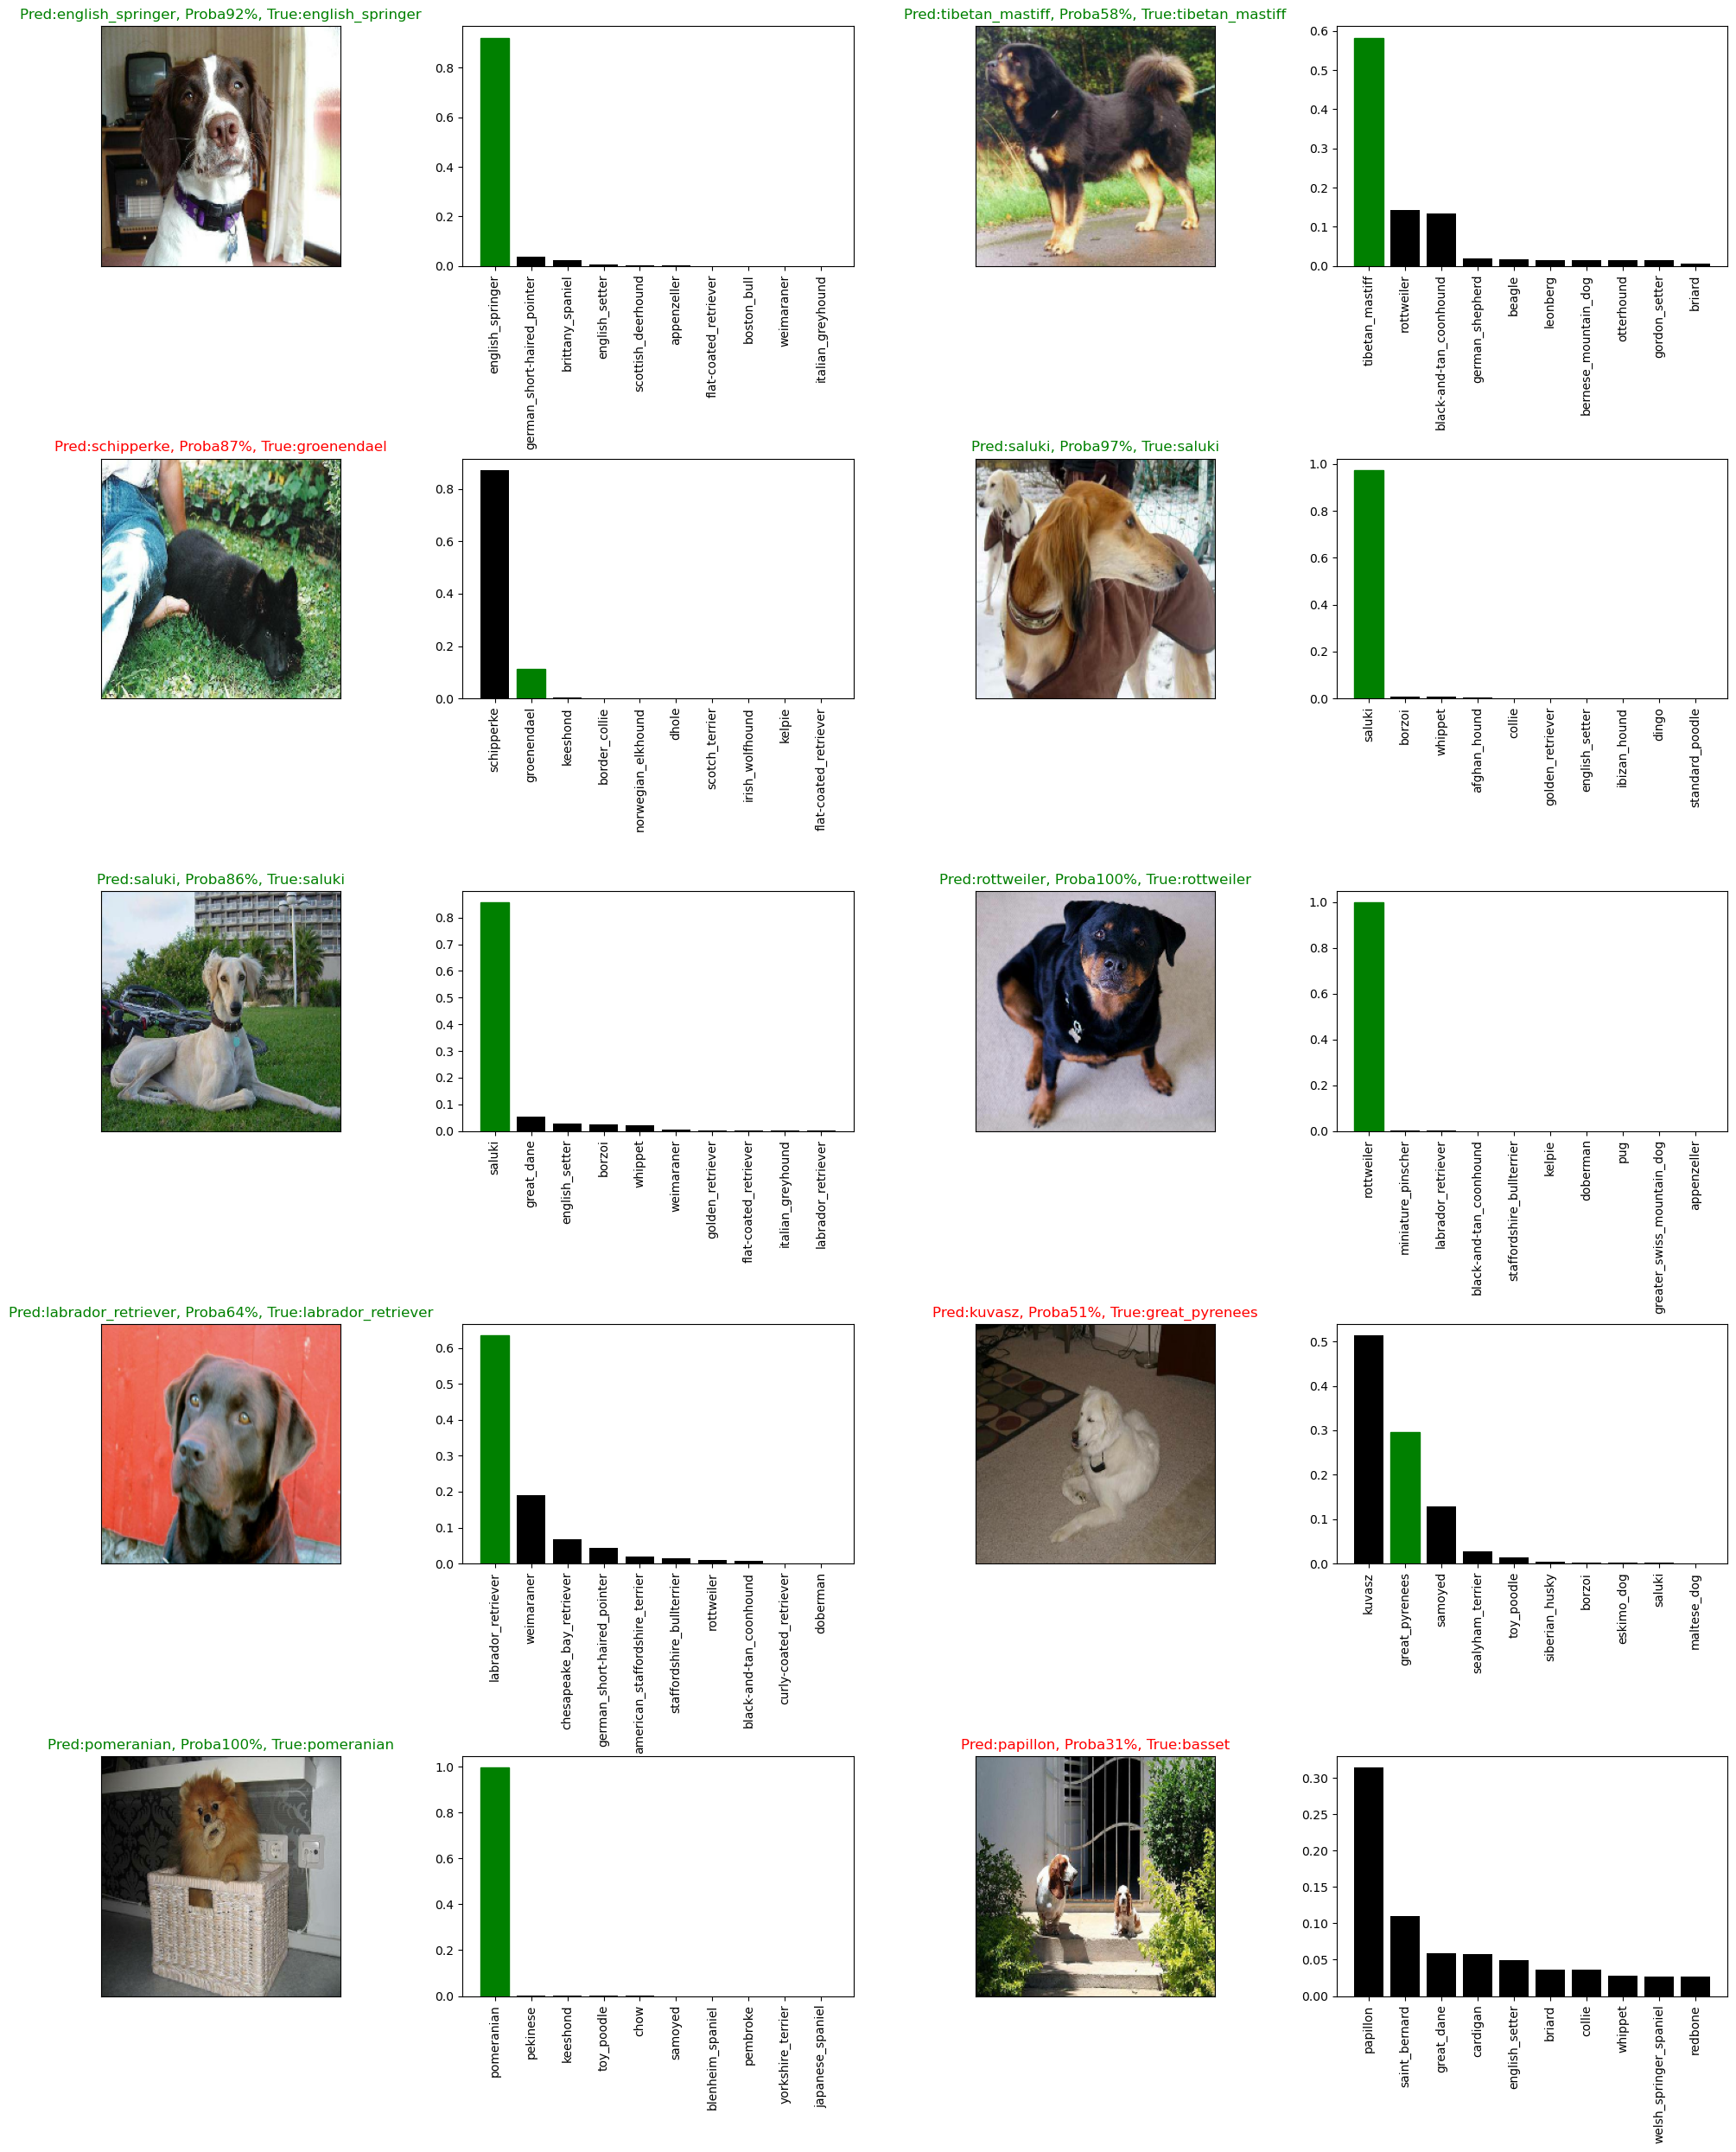

In [177]:
i_multiplier = 0
num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels=val_labels,
                   n=i+i_multiplier)
plt.tight_layout(h_pad=0.2)
plt.show()

## Save and Load a Trained Model in Tensor Flow

In [178]:
# Create a function to save a trained model

def save_model(model, suffix=None):
    modeldir = os.path.join(".\models",
                            datetime.datetime.now().strftime("%Y%m%d_%H%M"))
    model_path = modeldir + "_" + suffix + ".h5"
    print(f"Saving model to {model_path}...")
    model.save(model_path)
    return model_path

In [179]:
# Create a function to load a model

def load_model(model_path):
    print(f"Loading model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                       custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [180]:
save_model(model, suffix="1000img_mobilenetv2_Adam")

Saving model to .\models\20230329_1732_1000img_mobilenetv2_Adam.h5...


'.\\models\\20230329_1732_1000img_mobilenetv2_Adam.h5'

In [95]:
# loaded_model = load_model("./models/20230322_1709_1000img_mobilenetv2_Adam.h5")

In [96]:
# Evaluate the pre-saved model

# model.evaluate(val_data)

In [97]:
# Evaluate the loaded model

# loaded_model.evaluate(val_data)

## Train the model
### FULL DATA

In [181]:
len(X), len(y)

(10222, 10222)

In [182]:
# Create data batches with the full dataset

full_data = data_to_batch(X, y)

Creating training data batches...


In [183]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [184]:
full_model = create_model()

Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4


In [185]:
full_model_tensorboard = create_tensorboard_callback()

In [186]:
# Full data does not have a validation data set...

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [188]:
# Fit the full_model to the full_data

full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])


Epoch 1/100
320/320 [==============================] - 44s 122ms/step - loss: 2.3241 - accuracy: 0.4669
Epoch 2/100
320/320 [==============================] - 39s 122ms/step - loss: 0.8481 - accuracy: 0.7831
Epoch 3/100
320/320 [==============================] - 41s 127ms/step - loss: 0.5064 - accuracy: 0.8815
Epoch 4/100
320/320 [==============================] - 41s 129ms/step - loss: 0.3266 - accuracy: 0.9454
Epoch 5/100
320/320 [==============================] - 40s 124ms/step - loss: 0.2518 - accuracy: 0.9677
Epoch 6/100
320/320 [==============================] - 41s 127ms/step - loss: 0.2190 - accuracy: 0.9756
Epoch 7/100
320/320 [==============================] - 39s 123ms/step - loss: 0.2034 - accuracy: 0.9820
Epoch 8/100
320/320 [==============================] - 39s 122ms/step - loss: 0.1956 - accuracy: 0.9817
Epoch 9/100
320/320 [==============================] - 39s 123ms/step - loss: 0.1979 - accuracy: 0.9801
Epoch 10/100
320/320 [==============================] - 39s 122m

In [189]:
save_model(model, suffix="full_mobilenetv2_Adam")

Saving model to .\models\20230329_1742_full_mobilenetv2_Adam.h5...


'.\\models\\20230329_1742_full_mobilenetv2_Adam.h5'

## Make predictions with the test dataset

Preprocess the test dataset as the train dataset

https://www.kaggle.com/competitions/dog-breed-identification/overview

In [191]:
loaded_full_model = load_model("./models/20230329_1742_full_mobilenetv2_Adam.h5")

Loading model from: ./models/20230329_1742_full_mobilenetv2_Adam.h5


To do with the TEST dataset:
* Get the test filenames
* Convert the filenames into test data batches using 
* Make a predictions array

In [192]:
test_path = "test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:5]

['test/000621fb3cbb32d8935728e48679680e.jpg',
 'test/00102ee9d8eb90812350685311fe5890.jpg',
 'test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'test/001a5f3114548acdefa3d4da05474c2e.jpg']

In [193]:
len(test_filenames)

10357

In [194]:
test_data = data_to_batch(test_filenames, test_data=True)

Creating test data batches...


In [195]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [196]:
%%time

# Make predictions on test data batch using the loaded full model

test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 10s 29ms/step
CPU times: total: 1min 33s
Wall time: 10 s


In [197]:
# Save predictions (NumPy array) to .csv
np.savetxt("preds_array.csv", test_predictions, delimiter=",")

In [198]:
# Load predictions from .csv
test_predictions = np.loadtxt("preds_array.csv", delimiter=",")

## Prepare the submission document for Kaggle

In [199]:
test_predictions.shape

(10357, 120)

To do:
* Create a pandas df from the numpy array
* Add an ID column with the IDs
* Add the breed titles to the 120 other columns

In [200]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))

In [201]:
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [202]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [203]:
test_ids

['000621fb3cbb32d8935728e48679680e',
 '00102ee9d8eb90812350685311fe5890',
 '0012a730dfa437f5f3613fb75efcd4ce',
 '001510bc8570bbeee98c8d80c8a95ec1',
 '001a5f3114548acdefa3d4da05474c2e',
 '00225dcd3e4d2410dd53239f95c0352f',
 '002c2a3117c2193b4d26400ce431eebd',
 '002c58d413a521ae8d1a5daeb35fc803',
 '002f80396f1e3db687c5932d7978b196',
 '0036c6bcec6031be9e62a257b1c3c442',
 '0041940322116ae58c38130f5a6f71f9',
 '0042d6bf3e5f3700865886db32689436',
 '004476c96f575879af4af471af65cae8',
 '00485d47de966a9437ad3b33ac193b6f',
 '00496f65de6cc319145ce97bd6e90360',
 '004bf14426d1a830d459a9e0c0721309',
 '004c3721eb88358f462cdcec6b2380b7',
 '00559f56aab7e0a7749220f6aed65162',
 '005b281f1a4d6f29d527c9585e9bd33c',
 '005b6c6c76fefd6b458ef6fb6e54da6e',
 '006870b49353779b25eeb91fed43c31a',
 '0068f3a21b159ece126a28580cdad7a0',
 '0069b1cc4546fc98f84f981bf9a0696a',
 '0077bc3c63486ff09d3774d956af8f76',
 '00780e5d2bf4f7e4b5f96d08ddde669a',
 '007ed71136966728f5c0936e23c8286b',
 '0081831ceb49cd64212c32b884036b82',
 

In [204]:
preds_df["id"] = test_ids

In [205]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [206]:
preds_df[list(unique_breeds)] = test_predictions

In [207]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   4.343797e-07  1.107142e-06   
1  00102ee9d8eb90812350685311fe5890   2.185193e-07  2.347866e-08   
2  0012a730dfa437f5f3613fb75efcd4ce   2.572882e-06  8.754784e-05   
3  001510bc8570bbeee98c8d80c8a95ec1   2.808238e-03  2.176342e-04   
4  001a5f3114548acdefa3d4da05474c2e   7.707954e-03  3.016956e-04   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         5.901297e-07  2.262630e-06                    4.792585e-07   
1         1.351896e-09  6.754781e-08                    7.357080e-07   
2         4.599092e-06  5.349265e-06                    1.654493e-07   
3         1.607699e-05  1.406240e-04                    2.474249e-04   
4         5.594204e-07  6.133560e-06                    1.462417e-05   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  9.764684e-07        4.344108e-07  2.575833e-06  5.373328e-08  ...   
1  2.247787e-10        1.035348e-07  4.876975e-08  7.609187e-09  ...   
2  9.624854e-07        2.394001e-06  2.927723e-07  2.592727e-06  ...   
3  2.213478e-05        7.189024e-04  9.929613e-04  6.291579e-05  ...   
4  5.757175e-07        3.279059e-04  1.445778e-05  7.500016e-06  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  6.224387e-07  1.532528e-07  3.152008e-07  1.013380e-06  2.145847e-07   
1  9.532485e-06  1.592699e-08  1.180951e-07  2.777967e-09  6.319308e-08   
2  4.900911e-05  6.456157e-06  7.885800e-06  6.102586e-07  2.340141e-06   
3  2.412391e-04  9.324891e-06  9.177096e-05  9.239737e-05  1.377423e-03   
4  1.419703e-04  8.042123e-08  7.298356e-06  4.909017e-05  3.648418e-06   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.608060e-06                 2.516642e-08  5.056360e-08   
1            1.892419e-09                 3.228109e-05  1.215082e-08   
2            8.487110e-05                 4.536932e-06  1.025299e-06   
3            3.512486e-06                 4.789270e-03  3.795019e-05   
4            2.048346e-06                 7.707980e-05  1.437095e-05   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.126841e-06       5.340718e-06  
1             2.582643e-08       2.074299e-07  
2             1.328205e-07       2.199687e-06  
3             8.719691e-06       2.195766e-04  
4             1.058479e-05       1.778243e-04  

[5 rows x 121 columns]

In [210]:
preds_df.to_csv("submision_inesgcalvo_002.csv", index=False)

## Making predictions on custom images

Now I will test the model using pictures of **Gauss.** <br>
Gauss's mother is a `german_short-haired_pointer` <br>
and I strongly think that his father is a `labrador_retriever`

To do:
* Define Filepaths
* Turn images to tensors
* Turn tensors into batches
* Pass the custom batch to the model
* Convert the prediction probabilities into prediction labels
* Compare the predicted labels to the custom images

In [211]:
custom_path = "My_dog_photos/"
custom_img_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [212]:
custom_img_paths

['My_dog_photos/IMG_20210613_152849_6.jpg',
 'My_dog_photos/IMG_7937.JPG',
 'My_dog_photos/IMG_8133.JPG']

In [213]:
custom_data = data_to_batch(custom_img_paths, test_data=True)

Creating test data batches...


In [214]:
custom_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [215]:
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 257ms/step


In [216]:
custom_preds.shape

(3, 120)

In [217]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]


In [218]:
custom_pred_labels

['labrador_retriever', 'bluetick', 'labrador_retriever']

In [219]:
custom_images = []

for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

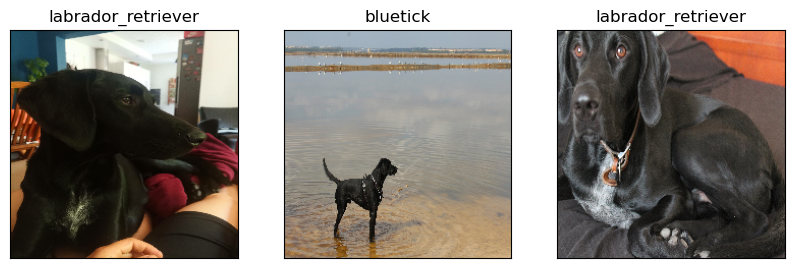

In [220]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)

In [224]:
custom_true_labels = ["labrador_retriever", "labrador_retriever", "labrador_retriever"]

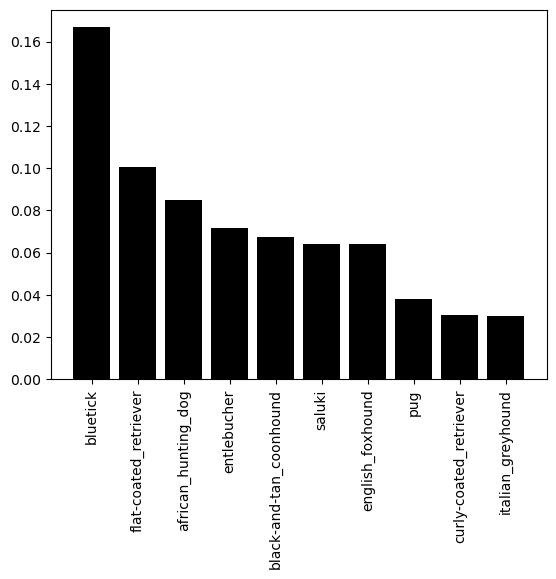

In [225]:
plot_pred_conf(prediction_probabilities=custom_preds,
               labels=custom_true_labels)

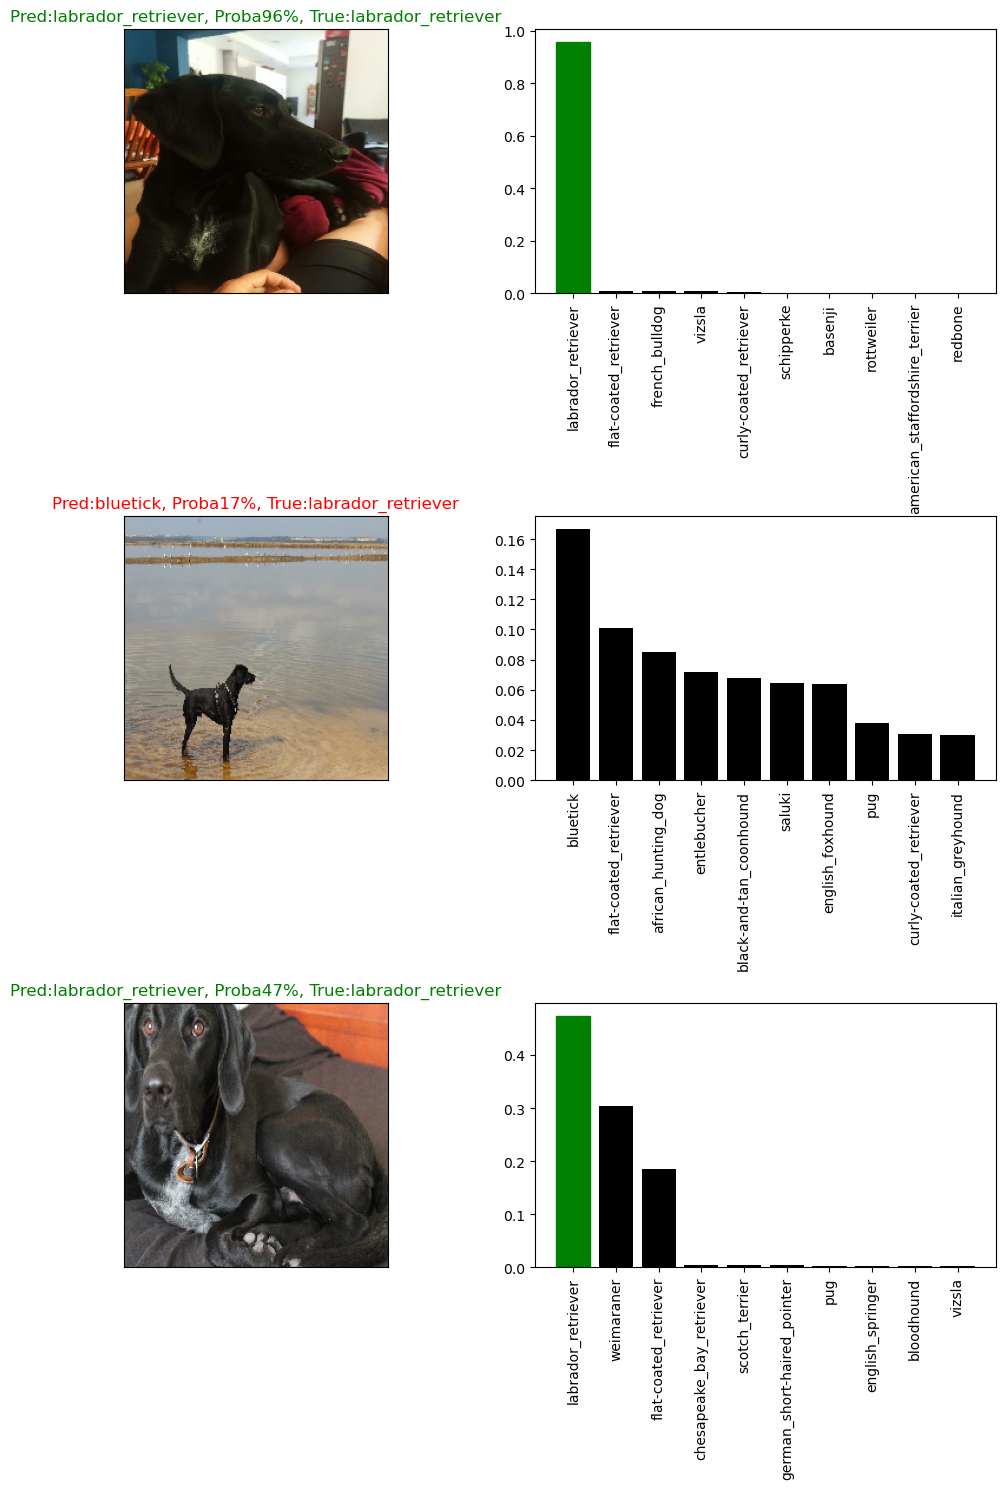

In [226]:
i_multiplier = 0
num_rows = 3
num_cols = 1
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=custom_preds,
              labels=custom_true_labels,
              images=custom_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=custom_preds,
                   labels=custom_true_labels,
                   n=i+i_multiplier)
plt.tight_layout(h_pad=0.2)
plt.show()